## Data Loading and Preparation

In [12]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

StatementMeta(machineLearning, 1, 13, Finished, Available, Finished)

In [15]:
# Read the CSV file into a Spark DataFrame
df = spark.read.load('abfss://datalakeforasa@sorgefordatalake.dfs.core.windows.net/DemoDW/FinalVersionOfOurData.csv', format='csv', header=True)

# Convert the Spark DataFrame to a Pandas DataFrame
df = df.toPandas()

# Display the first 10 rows of the Pandas DataFrame
df.head(10)

StatementMeta(machineLearning, 1, 16, Finished, Available, Finished)

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"
5,2017-03-10 01:00:00,"55,2","16,98","3079,1","564,697","396,533","10,0705","1,74","250,73","248,906",...,"251,873","444,384","443,269","460,449","439,92","451,588","433,539","425,458","66,91","1,31"
6,2017-03-10 01:00:00,"55,2","16,98","3127,79","566,467","392,9","10,0713","1,74","250,313","252,202",...,"253,477","446,185","444,571","452,306","431,328","443,548","444,575","431,251","66,91","1,31"
7,2017-03-10 01:00:00,"55,2","16,98","3152,93","558,777","397,002","10,0722","1,74","249,895","253,63",...,"253,345","445,985","461,341","461,64","442,067","441,73","461,77","449,679","66,91","1,31"
8,2017-03-10 01:00:00,"55,2","16,98","3147,27","556,03","394,307","10,073","1,74","250,137","251,104",...,"250,884","446,686","478,385","459,103","455,074","439,798","457,738","455,915","66,91","1,31"
9,2017-03-10 01:00:00,"55,2","16,98","3142,58","565,857","393,105","10,0738","1,74","249,653","252,202",...,"248,137","445,685","478,779","460,665","457,225","453,236","449,898","455,75","66,91","1,31"


### Data Cleaning and Transformation

In [16]:
# Drop the 'date' column
df.drop(['date'], axis=1, inplace=True)

# Replace commas with dots and convert to float32 for string columns
for col in df.columns:
    if df[col].dtype == 'object':  # Ensure the column is a string type
        df[col] = df[col].str.replace(',', '.').astype('float32')


StatementMeta(machineLearning, 1, 17, Finished, Available, Finished)

### Handling Duplicates

In [17]:
df.duplicated().sum()
df = df.drop_duplicates()
df.shape

StatementMeta(machineLearning, 1, 18, Finished, Available, Finished)

(736282, 23)

### Exploratory Data Analysis: Correlation Matrix

StatementMeta(machineLearning, 1, 19, Finished, Available, Finished)

<Axes: >

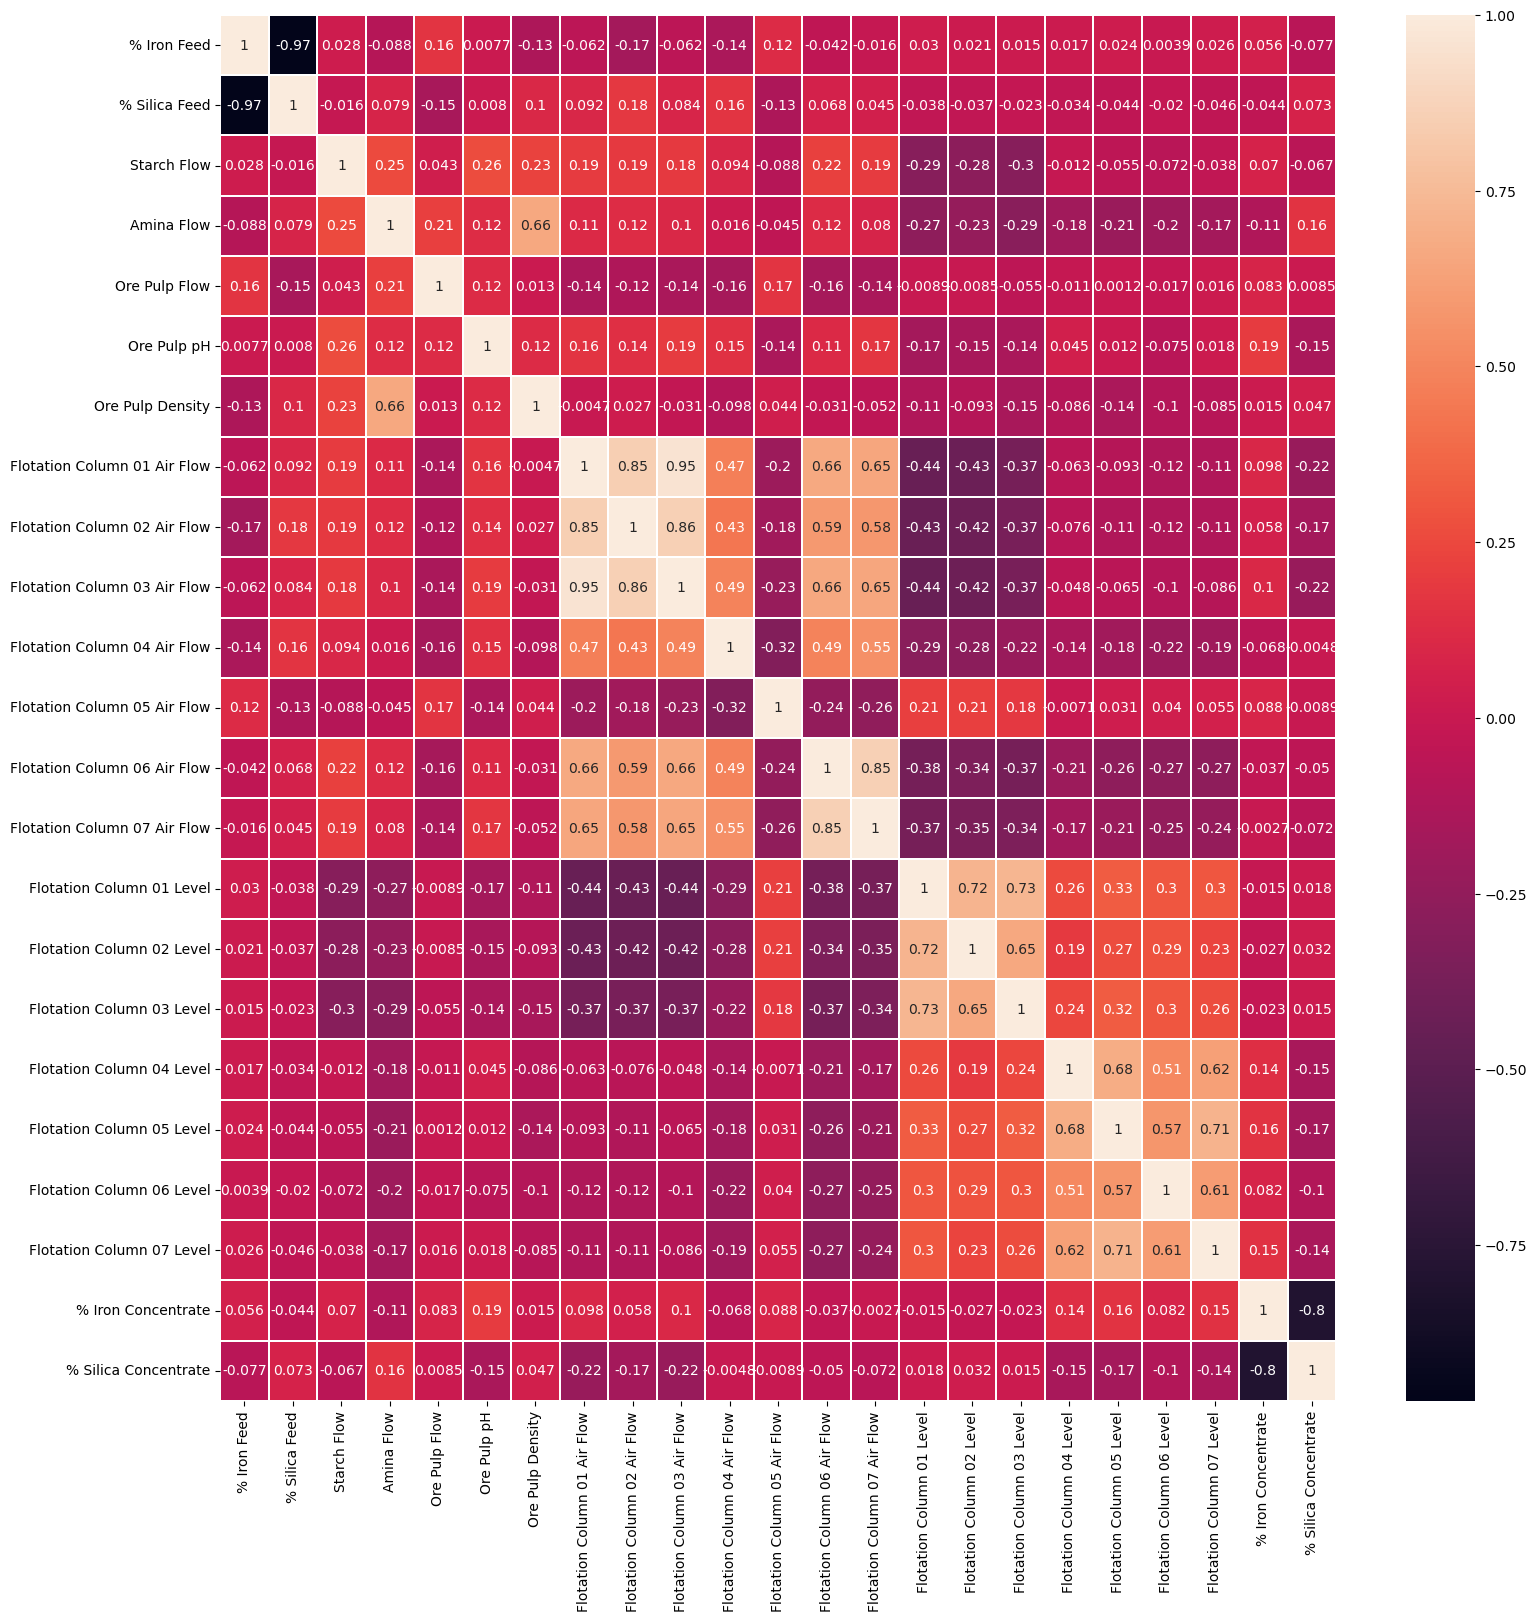

In [18]:
fig = plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), linewidths=0.003, linecolor='white', annot=True)


### Exploratory Data Analysis: Boxplots

StatementMeta(machineLearning, 1, 21, Finished, Available, Finished)

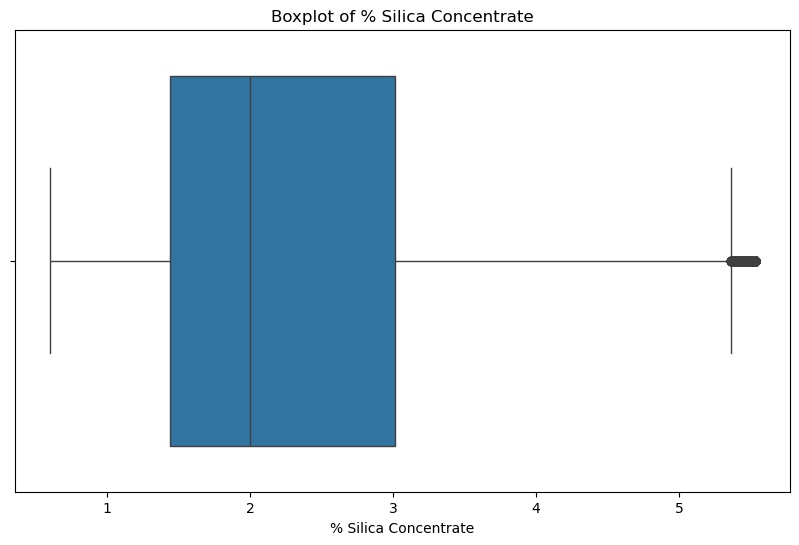

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['% Silica Concentrate'])  # Replace with any other column if needed
plt.title('Boxplot of % Silica Concentrate')
plt.show()

### Split the dataset into features (X) and target variable (y)

In [21]:
X = df.drop(columns=['% Silica Concentrate'])  # Assuming this is the target column
y = df['% Silica Concentrate']

StatementMeta(machineLearning, 1, 22, Finished, Available, Finished)

### Split the data into training and testing sets (80% train, 20% test)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

StatementMeta(machineLearning, 1, 23, Finished, Available, Finished)

### Feature scaling (important for SVR)

In [23]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

StatementMeta(machineLearning, 1, 24, Finished, Available, Finished)

In [24]:
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

StatementMeta(machineLearning, 1, 25, Finished, Available, Finished)

### Model: Support Vector Regression (SVR)

In [25]:
svr_model = SVR(kernel='rbf')  # You can change the kernel to 'linear', 'poly', etc.
svr_model.fit(X_train_scaled, y_train_scaled)

StatementMeta(machineLearning, 1, 26, Submitted, Running, Running)

### Inverse scaling to get predictions back to the original scale

In [ ]:
y_pred_svr_original = scaler_y.inverse_transform(y_pred_svr)

### Evaluate the model using R-squared score

In [ ]:
r2_svr = r2_score(y_test, y_pred_svr_original)
print(f"R-squared Score for SVR: {r2_svr}")

### Plot actual vs predicted values for SVR

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr_original, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.title('Actual vs Predicted Values (SVR)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()